In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-cost/dataset_.csv


In [2]:
df = pd.read_csv('/kaggle/input/medical-cost/dataset_.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1337 non-null   int64  
 1   sex              1337 non-null   object 
 2   bmi              1337 non-null   float64
 3   children         1337 non-null   int64  
 4   smoker           1337 non-null   object 
 5   region           1337 non-null   object 
 6   medical charges  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

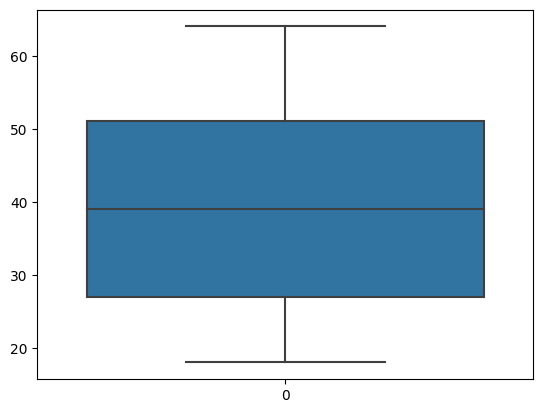

In [9]:
sns.boxplot(df['age'])

<Axes: xlabel='sex'>

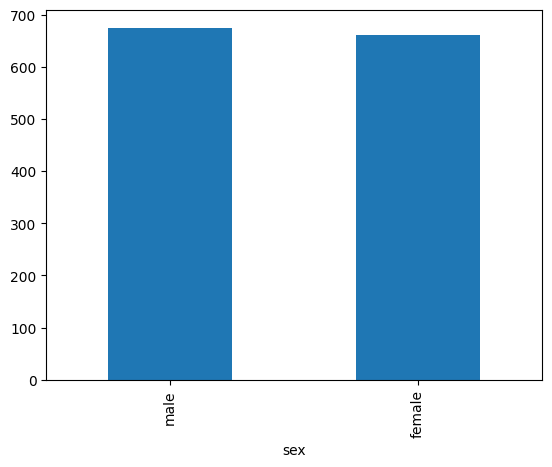

In [10]:
df['sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='children'>

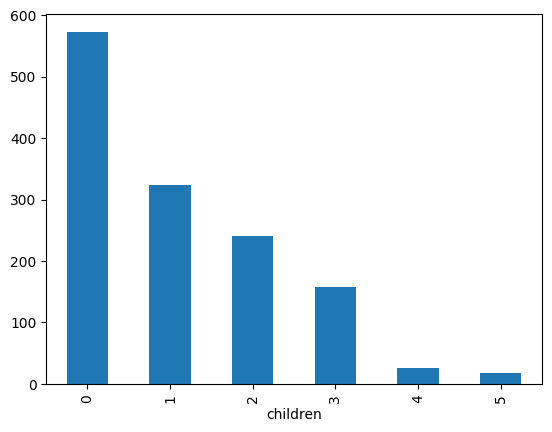

In [11]:
df['children'].value_counts().plot(kind = 'bar')

<Axes: xlabel='region'>

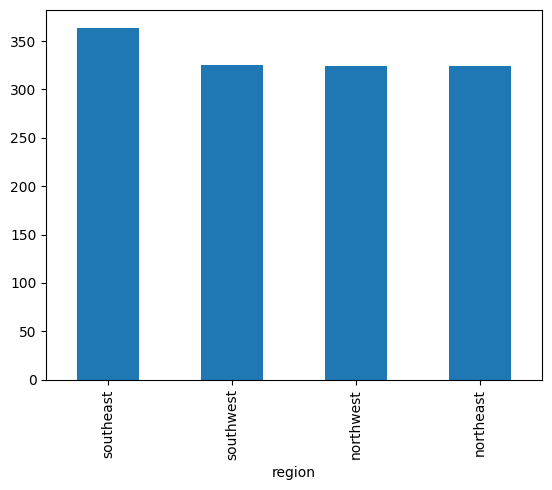

In [12]:
df['region'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoker'>

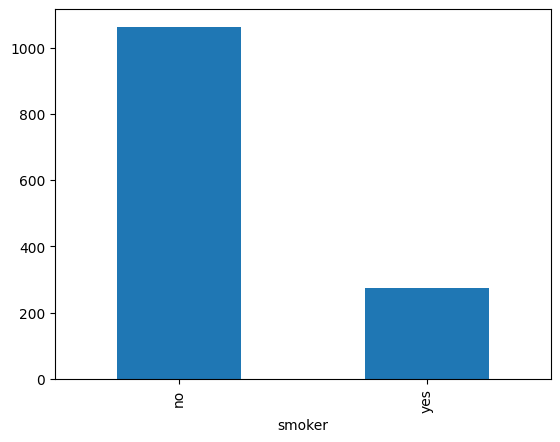

In [13]:
df['smoker'].value_counts().plot(kind = 'bar')

<Axes: >

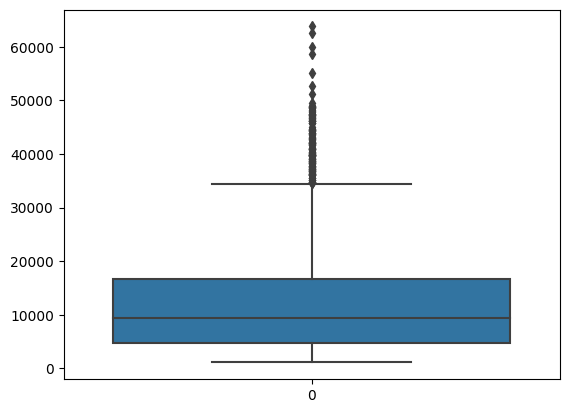

In [14]:
sns.boxplot(df['medical charges'])

In [15]:
# 25th and 75th percentiles
percentile25 = df['medical charges'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['medical charges'].quantile(0.75)
print("75th Percentile:", percentile75)

# interquartile range (IQR)
iqr = percentile75 - percentile25

# upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Capping the outliers
new_df = df.copy()
new_df['medical charges'] = np.where(
    new_df['medical charges'] > uplimit, uplimit,
    np.where(new_df['medical charges'] < lolimit, lolimit, new_df['medical charges'])
)

new_df.head()

25th Percentile: 4746.344
75th Percentile: 16657.71745
Upper Limit: 34524.777625 Lower Limit: -13120.716174999998


,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df = new_df.copy()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Linear Regression

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Y' is your target column
X = df.drop(columns=['medical charges'])
y = df['medical charges']

# Specify the categorical column names, excluding the target column
categorical_features = ['sex', 'smoker', 'region']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Linear Regression
step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Print regression metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 20913453.804241873
Mean Absolute Error: 3148.8373898312543
R2 Score: 0.8210286113815228


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Random Forest Regressor

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Y' is your target column
X = df.drop(columns=['medical charges'])
y = df['medical charges']

# Specify the categorical column names, excluding the target column
categorical_features = ['sex', 'smoker', 'region']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Random Forest Regressor
step2 = RandomForestRegressor()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Print regression metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 18365699.97048805
Mean Absolute Error: 2261.4648122792964
R2 Score: 0.842831563957079
